In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from PIL import Image

def save_circuit_diagram(circuit, filename, folder='report/img', dpi=300, 
                         save_color=True, save_grayscale=True, 
                         style=None, return_figure=True):
    """
    Draw and save a quantum circuit diagram in color and/or grayscale formats.
    
    Args:
        circuit (QuantumCircuit): The quantum circuit to draw
        filename (str): Base filename without extension
        folder (str): Directory to save images (will be created if it doesn't exist)
        dpi (int): Resolution of the saved images
        save_color (bool): Whether to save the color version
        save_grayscale (bool): Whether to save the grayscale version
        style (dict): Optional style dictionary for the circuit drawing
        return_figure (bool): Whether to return the matplotlib figure
        
    Returns:
        The matplotlib figure object if return_figure is True
    """
    # Create the directory if it doesn't exist
    os.makedirs(folder, exist_ok=True)
    
    # Full paths for the files
    color_path = os.path.join(folder, f"{filename}_color.png")
    gray_path = os.path.join(folder, f"{filename}_grayscale.png")
    
    # Draw the circuit
    if style:
        try:
            fig = circuit.draw(output="mpl", style=style)
        except Exception as e:
            print(f"Style error: {e}. Falling back to default style.")
            fig = circuit.draw(output="mpl")
    else:
        fig = circuit.draw(output="mpl")
    
    # Save color version if requested
    if save_color:
        fig.savefig(color_path, dpi=dpi, bbox_inches='tight')
        print(f"Saved color circuit diagram to {color_path}")
    
    # Save grayscale version if requested
    if save_grayscale:
        # Save temporary color version if we're not keeping it
        temp_path = color_path if save_color else os.path.join(folder, f"{filename}_temp.png")
        if not save_color:
            fig.savefig(temp_path, dpi=dpi, bbox_inches='tight')
        
        # Convert to grayscale using PIL
        img = Image.open(temp_path).convert('L')
        img.save(gray_path)
        print(f"Saved grayscale circuit diagram to {gray_path}")
        
        # Delete temporary file if we created one
        if not save_color:
            os.remove(temp_path)
    
    # Close the figure to free memory unless we're returning it
    if not return_figure:
        plt.close(fig)
    
    return fig if return_figure else None

In [3]:
from teleportation_validator import TeleportationValidator

validator = TeleportationValidator(payload_size=1, gates=['x'], use_barriers=True, save_statevector=True)

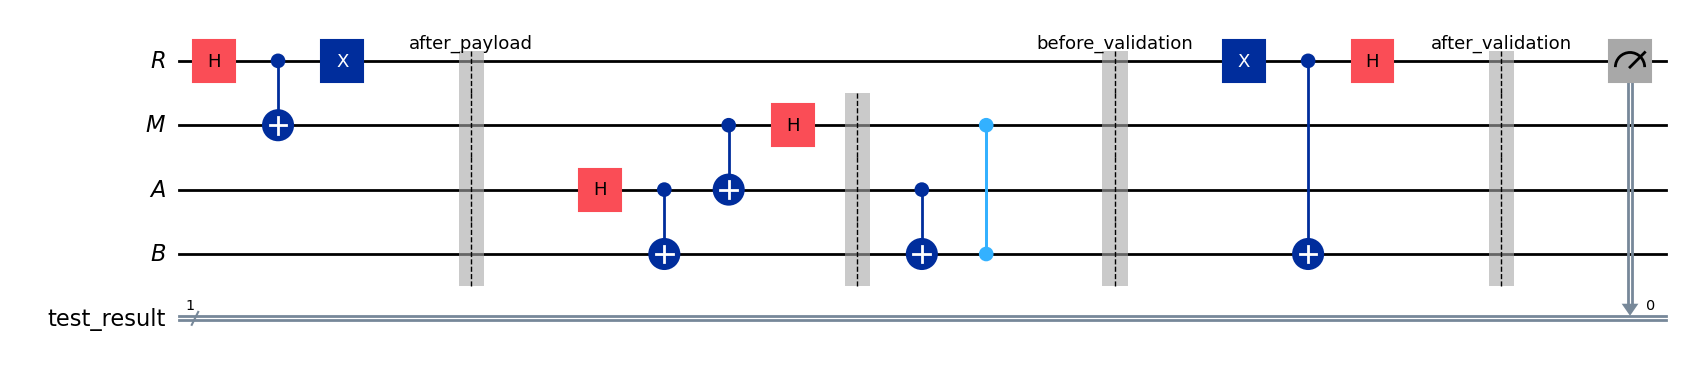

In [4]:
vtp = validator.draw()
vtp

Saved color circuit diagram to report/img/vtp_circuit_color.png
Saved grayscale circuit diagram to report/img/vtp_circuit_grayscale.png


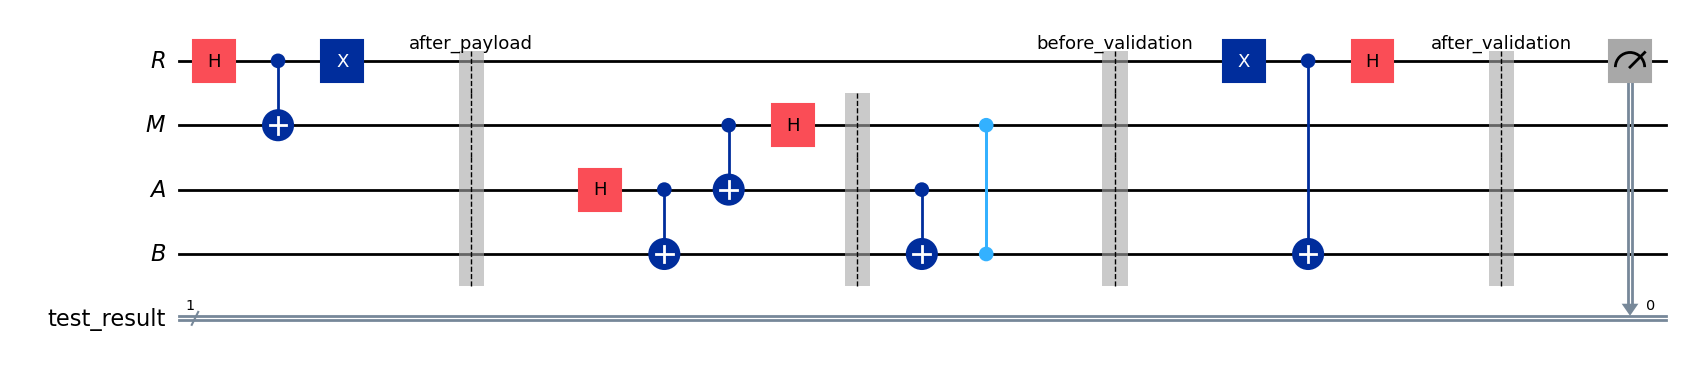

In [5]:
save_circuit_diagram(validator.circuit, 'vtp_circuit')

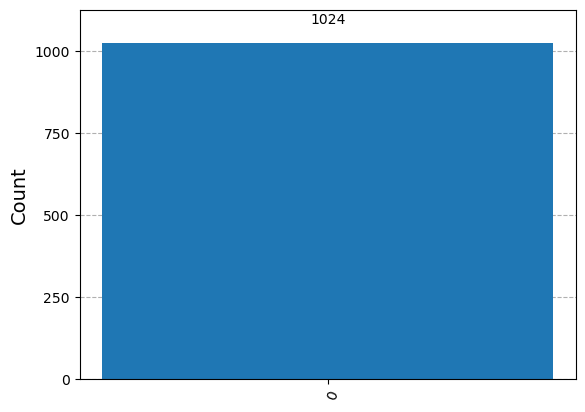


State vector after payload:


<IPython.core.display.Latex object>


State vector before validation:


<IPython.core.display.Latex object>


State vector after validation:


<IPython.core.display.Latex object>

{'results_metrics': {'counts': {'0': 1024}, 'success_rate': 1.0},
 'circuit_metrics': {'depth': 13,
  'width': 5,
  'size': 13,
  'count_ops': OrderedDict([('cx', 5),
               ('h', 4),
               ('save_statevector', 3),
               ('x', 2),
               ('barrier', 2),
               ('cz', 1),
               ('measure', 1)]),
  'num_qubits': 4,
  'num_clbits': 1,
  'num_ancillas': 0,
  'num_parameters': 0,
  'has_calibrations': False,
  'has_layout': False},
 'config_metrics': {'payload_size': 1},
 'custom_gate_distribution': {'x': 1},
 'statevector_data': {'after_payload': Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
               0.        +0.j, 0.        +0.j, 0.        +0.j,
               0.        +0.j, 0.        +0.j, 0.        +0.j,
               0.        +0.j, 0.        +0.j, 0.        +0.j,
               0.        +0.j, 0.        +0.j, 0.        +0.j,
               0.        +0.j],
              dims=(2, 2, 2, 2)),
  'before_validation'

In [26]:
validator.run_simulation()